# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [44]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1 (4pt)
What was the mean finishing time in the random sample?

In [14]:
dfs = pd.read_csv('run10sample.csv')
dfs['time'].mean()

98.1504

### Question 2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [15]:
groupedByGender = dfs.groupby(dfs['gender'])
groupedByGender.size()

gender
F    14
M    11
dtype: int64

### Question 3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [16]:
groupedByGender['time'].mean()

gender
F    103.496429
M     91.346364
Name: time, dtype: float64

## Task 2: Resampling from the population (47 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [33]:
df = pd.read_csv('run10.csv')
print('Mean:',df['time'].mean())

Mean: 94.51597470897607


> the population mean is about 3-4 seconds less than the sample. This can't be explained by the gender distribution as the ratios of men to women are very similar (and the population actually has a lower man to woman ratio than the sample). The mean age of the sample is also only 2 years older than the population. The only way to improve our estimate is to gather more samples.

### Question 2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistics


In [36]:
def bootstrap(data, N, fcn, numIter = 1000):
    array = np.zeros(numIter)
    for i in range(numIter):
        sample = np.random.choice(data, size=N)
        x = fcn(sample)
        array[i] = x
    return array

### Question 3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled. Report the mean and the standard deviation of the resampled estimates. 

Mean: 94.4957868
Standard Deviation: 3.171715052495378


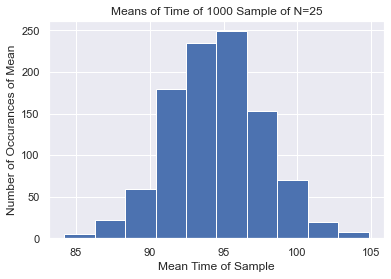

In [83]:
def getMean(sample):
    return sample.mean()
meanBootstrap = bootstrap(df['time'], 25, getMean)
plt.hist(meanBootstrap, bins = 10)
plt.title("Means of Time of 1000 Sample of N=25")
plt.xlabel("Mean Time of Sample")
plt.ylabel("Number of Occurances of Mean")
print('Mean:',meanBootstrap.mean())
print('Standard Deviation:',meanBootstrap.std())

### Question 4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

In [84]:
meanBootstrap50 = bootstrap(df['time'], 50, getMean)
meanBootstrap100 = bootstrap(df['time'], 100, getMean)

print('N = 50')
print('Mean:',meanBootstrap50.mean())
print('Standard Deviation:',meanBootstrap50.std())

print('\nN = 100')
print('Mean:',meanBootstrap100.mean())
print('Standard Deviation:',meanBootstrap100.std())

N = 50
Mean: 94.5512518
Standard Deviation: 2.253254762373035

N = 100
Mean: 94.4700993
Standard Deviation: 1.5745581886451543


> the standard deviation changed the most, because the greater the sample size, the more likely you'll get closer to the population mean, and hence the means get more concentrated.

### Question 5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [85]:
print('The predicted standard error of the mean for the sample size N=25 is',df['time'].std()/(25**(1/2)))
print('The predicted standard error of the mean for the sample size N=50 is',df['time'].std()/(50**(1/2)))
print('The predicted standard error of the mean for the sample size N=100 is',df['time'].std()/(100**(1/2)))

The predicted standard error of the mean for the sample size N=25 is 3.1844251740179077
The predicted standard error of the mean for the sample size N=50 is 2.251728634729214
The predicted standard error of the mean for the sample size N=100 is 1.5922125870089539


> They do match, as when sample size goes up, both error and standard deviation go down. Even the numbers are very similar.

## Task 3: Calculating confidence intervals (24pt) 
### Question 1 (8pt)
Write a function (confidenceInt) that determines a confidence interval for a data series. 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percept? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [86]:
def confidenceInt(data, prec):
    bounds = np.percentile(data, [(100-prec)/2,100-(100-prec)/2])
    return bounds

### Question 2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [87]:
confInt = confidenceInt(meanBootstrap, 95)
print('The confidence interval is {',confInt[0],', ',confInt[1],'}',sep='')

The confidence interval is {88.27517, 100.92755}


### Question 3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

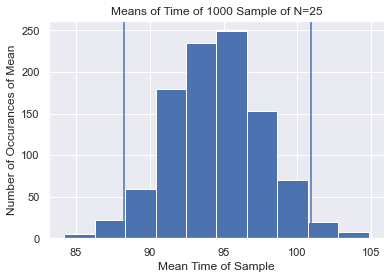

In [88]:
plt.hist(meanBootstrap, bins = 10)
plt.title("Means of Time of 1000 Sample of N=25")
plt.xlabel("Mean Time of Sample")
plt.ylabel("Number of Occurances of Mean")
plt.axvline(confInt[0])
plt.axvline(confInt[1])

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [102]:
sampleBootstrap = bootstrap(dfs['time'], 25, getMean)
sampleConfInt = confidenceInt(sampleBootstrap, 95)

print('Mean:',sampleBootstrap.mean())
print('Standard Deviation:',sampleBootstrap.std())
print('95% Confidence Interval:',sampleConfInt)

Mean: 98.1885236
Standard Deviation: 2.8748853725884516
95% Confidence Interval: [ 92.46891 104.16756]


### Question 2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels. 

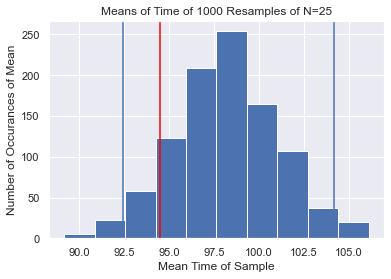

In [104]:
plt.hist(sampleBootstrap, bins = 10)
plt.title("Means of Time of 1000 Resamples of N=25")
plt.xlabel("Mean Time of Sample")
plt.ylabel("Number of Occurances of Mean")
plt.axvline(sampleConfInt[0])
plt.axvline(sampleConfInt[1])
plt.axvline(df['time'].mean(),c='red')

### Question 3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

> The confidence interval does include the true population mean. It does include the mean from last year's cherry blossom run. From the sample, we cannot conclude at 95% confidence that race times have gotten faster, as last year's time is still within the interval.